# Install requirements

In [1]:
!pip install sklearn pandas
!pip install prettytable
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2955 sha256=84f920ae4f7d91c4f653acda6bcf7a7b8964745b8677850366dbe1e64cea2249
  Stored in directory: /root/.cache/pip/wheels/f8/e0/3d/9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Read dataset

In [2]:
import pandas as pd
from google.colab import drive 
drive = drive.mount('/content/drive') 

Mounted at /content/drive


In [3]:
from prettytable import PrettyTable
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.tree import export_graphviz
from IPython import display
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
test_features = pd.read_csv("/content/drive/MyDrive/new_df/test_set.csv")
train_features = pd.read_csv("/content/drive/MyDrive/new_df/train_set.csv")
test_target = pd.read_csv("/content/drive/MyDrive/new_df/test_set_NB.csv")
train_target = pd.read_csv("/content/drive/MyDrive/new_df/train_set_NB.csv")

# Call **Random Fores**t from `sklearn`

In [32]:
print('Random forest')
from sklearn.ensemble import RandomForestClassifier

head = PrettyTable(['max_depth', 'max_node', 'random_state', 'n_estimatorsint', 'criterion', 'confusion_matrix', 'f1_score_micro_test', 'f1_score_micro_train']) 

f1_score_micro_test_array = []
f1_score_micro_train_array = []

max_depth_range = list(range(14,16))
max_node_range = [2,10,20,30,40,50,60,70,80,90,98]

for depth in max_depth_range:
  for node in max_node_range:
    '''Create random forest classifier'''
    model1 = RandomForestClassifier(n_estimators=80, criterion = 'gini' , max_depth = depth, max_leaf_nodes = node, random_state = 0)
    model2 = RandomForestClassifier(n_estimators=20, criterion = 'entropy' , max_depth = depth, max_leaf_nodes = node, random_state = 90)
  
    '''Train and test'''
    model1.fit(train_features, train_target)
    model2.fit(train_features, train_target)

    preds_test1 = model1.predict(test_features)
    preds_test2 = model2.predict(test_features)

    preds_train1 = model1.predict(train_features)
    preds_train2 = model2.predict(train_features)

    cr1 = confusion_matrix(test_target, preds_test1)
    cr2 = confusion_matrix(test_target, preds_test2)

    from sklearn.metrics import f1_score

    f1_micro_test1 = f1_score(test_target, preds_test1, average = 'micro')
    f1_micro_test2 = f1_score(test_target, preds_test2, average = 'micro')

    f1_micro_train1 = f1_score(train_target, preds_train1, average = 'micro')
    f1_micro_train2 = f1_score(train_target, preds_train2, average = 'micro')

    f1_score_micro_test1 = "%.2f"%round(f1_micro_test1, 2)
    f1_score_micro_test2 = "%.2f"%round(f1_micro_test2, 2)

    f1_score_micro_train1 = "%.2f"%round(f1_micro_train1, 2)
    f1_score_micro_train2 = "%.2f"%round(f1_micro_train2, 2)

    f1_score_micro_test_array.append(f1_score_micro_test1)
    f1_score_micro_test_array.append(f1_score_micro_test2)
    f1_score_micro_train_array.append(f1_score_micro_train1)
    f1_score_micro_train_array.append(f1_score_micro_train2)
 
    head.add_row([depth, node, '0', '80', 'gini', cr1, f1_score_micro_test1, f1_score_micro_train1]) 
    head.add_row([depth, node, '90', '20', 'entropy', cr2, f1_score_micro_test2, f1_score_micro_train2]) 
print(head)

Random forest


<ipython-input-32-d7806426fa47>:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model1.fit(train_features, train_target)
<ipython-input-32-d7806426fa47>:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2.fit(train_features, train_target)
<ipython-input-32-d7806426fa47>:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model1.fit(train_features, train_target)
<ipython-input-32-d7806426fa47>:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2.fit(train_features, train_target)
<ipython-input-32-d7806426fa47>:19: DataConversionWarning: A col

+-----------+----------+--------------+-----------------+-----------+--------------------+---------------------+----------------------+
| max_depth | max_node | random_state | n_estimatorsint | criterion |  confusion_matrix  | f1_score_micro_test | f1_score_micro_train |
+-----------+----------+--------------+-----------------+-----------+--------------------+---------------------+----------------------+
|     14    |    2     |      0       |        80       |    gini   | [[2510    0    0]  |         0.50        |         0.50         |
|           |          |              |                 |           |  [1520    0    0]  |                     |                      |
|           |          |              |                 |           |  [ 969    0    0]] |                     |                      |
|     14    |    2     |      90      |        20       |  entropy  | [[2510    0    0]  |         0.50        |         0.50         |
|           |          |              |         

ValueError: ignored

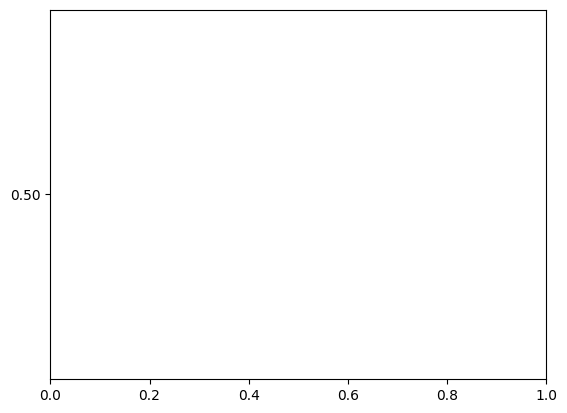

In [41]:
plt.plot(max_node_range, f1_score_micro_test_array) 
plt.xlabel('max node') 
plt.ylabel('f1 score micro test') 
plt.title('test plot') 
plt.show()

ValueError: ignored

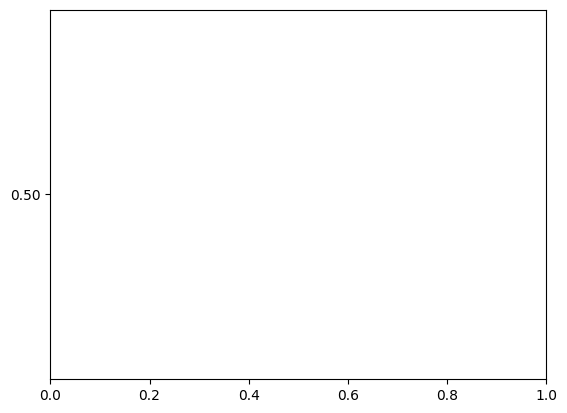

In [36]:
plt.plot(max_node_range, f1_score_micro_train_array) 
plt.xlabel('max node') 
plt.ylabel('f1 score micro train') 
plt.title('train plot') 
plt.show()